# 1. Inspecting the classification data
This is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a [public Kaggle competition](https://www.kaggle.com/kinguistics/heartbeat-sounds).

In [6]:
import librosa as lr
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

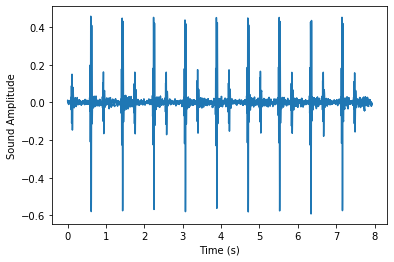

In [7]:
# List all the wav files in the folder
audio_files = glob('data/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

In [51]:
normal1, sfreq1 = lr.load(audio_files[44])
normal2, sfreq2 = lr.load(audio_files[45])
normal3, sfreq3 = lr.load(audio_files[46])
normal = pd.DataFrame(normal1)
normal[1] = pd.DataFrame(normal2)
normal[2] = pd.DataFrame(normal3)
normal.dropna(inplace=True)
normal = normal.iloc[1:150000]

abnormal4, sfreq4 = lr.load(audio_files[0])
abnormal5, sfreq5 = lr.load(audio_files[1])
abnormal6, sfreq6 = lr.load(audio_files[2])
abnormal = pd.DataFrame(abnormal4)
abnormal[1] = pd.DataFrame(abnormal5)
abnormal[2] = pd.DataFrame(abnormal6)
abnormal.dropna(inplace=True)
abnormal = abnormal.iloc[1:150000]

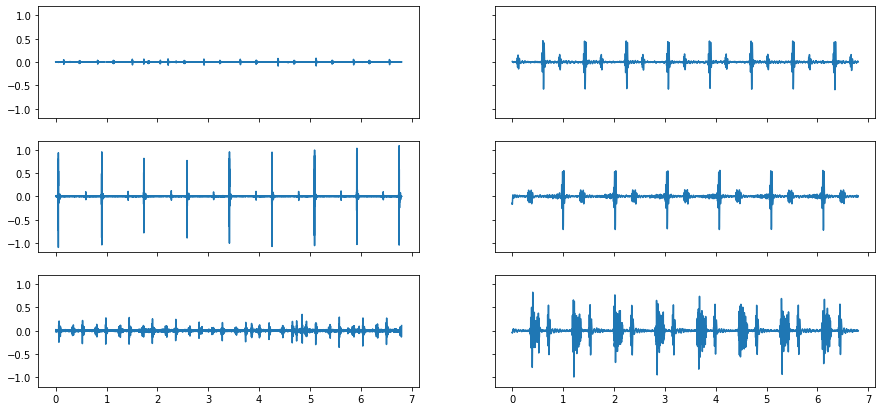

In [59]:
fig, axs = plt.subplots(3, 2, figsize=(15, 7), sharex=True, sharey=True)

# Calculate the time array
time = np.arange(normal.shape[0]) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)